## PLOTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# TeX fonts

lgndsize = 'x-large'
fontsize = 'xx-large'
params = {'text.usetex': True,
          'text.latex.preamble': [ # to conform with acmart style
              r'\usepackage[T1]{fontenc}',
              r'\usepackage[libertine]{newtxmath}',
              r'\usepackage{libertine}'
          ],
          'font.weight': 'regular',
          'legend.fontsize': lgndsize,         
          'axes.labelsize': fontsize,
          'axes.titlesize': fontsize,
          'xtick.labelsize': fontsize,
          'ytick.labelsize': fontsize,
         }

plt.style.use(['seaborn-paper']) # see plt.style.available
plt.rcParams.update(params)



/Users/mikhailgasanov/opt/anaconda3/envs/py3_pcse/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [21]:
water_loss = np.load('./water_loss.npy')
irrigation_ammount = np.load('./irrigation_ammount.npy')

crop_yiled = np.load('./crop_yield.npy')

Text(0.5, 1.0, 'Dependence of water losses in the lower horizons\n on the volume of total water for irrigation')

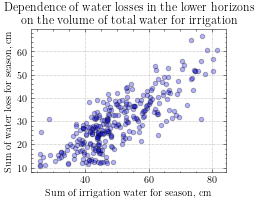

In [20]:
# plt.figure(figsize=(13,8))
plt.style.use(['science', 'grid'])
plt.scatter( irrigation_ammount, water_loss, edgecolors='black', facecolor='blue', s=20, alpha=0.3)
plt.xlabel('Sum of irrigation water for season, cm')
plt.ylabel('Sum of water loss for season, cm')
plt.title('Dependence of water losses in the lower horizons\n on the volume of total water for irrigation')
# plt.legend()
# plt.savefig('./plots_ICCS/water_loss_irrigation.png', dpi=300)
# plt.savefig('./plots_ICCS/water_loss_irrigation.svg' )

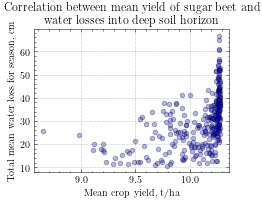

In [24]:
# plt.figure(figsize=(13,8))
plt.style.use(['science', 'grid'])
plt.scatter( crop_yiled, water_loss, edgecolors='black', facecolor='blue', s=20, alpha=0.3)
plt.xlabel('Mean crop yield, t/ha')
plt.ylabel('Total mean water loss for season, cm')
plt.title('Correlation between mean yield of sugar beet and\n water losses into deep soil horizon')
# plt.legend()
plt.savefig('./plots_ICCS/water_loss_crop_yield.png', dpi=300)
plt.savefig('./plots_ICCS/water_loss_crop_yield.svg' )

## pareto - front plots

In [3]:
import os

In [2]:
crop_yield = np.load('./npy_files/steps_300/сахарная свеклаcrop_yields.npy')
irrigation_amount = np.load('./npy_files/steps_300/сахарная свеклаirrifation_ammount.npy')
water_loss = np.load('./npy_files/steps_300/сахарная свеклаwater_loss.npy')
paretto_front = np.load('./npy_files/steps_300/сахарная свеклаfunction_values_for_paretto.npy')
optimal_solution = np.load('./npy_files/steps_300/сахарная свеклаoptimal_solutions.npy',allow_pickle=True)


In [60]:
paretto_front[:,0]

array([12.22296589, 12.00617763, 12.12692457, 12.15095707, 12.22210301,
       12.22190756, 12.09165948, 12.07798957, 12.20546361, 12.21954782,
       12.19866271, 12.06083606, 12.19298576, 12.18184238, 12.2112561 ,
       12.16161154, 12.1121412 , 12.221342  , 12.21529575, 12.17288126,
       12.18525811, 12.02093484, 12.0296781 , 12.22285352, 12.04413453,
       12.22182384, 12.21033223, 12.22268087, 12.21676293, 12.1678937 ])

Text(0.5, 1.0, 'Pareto front')

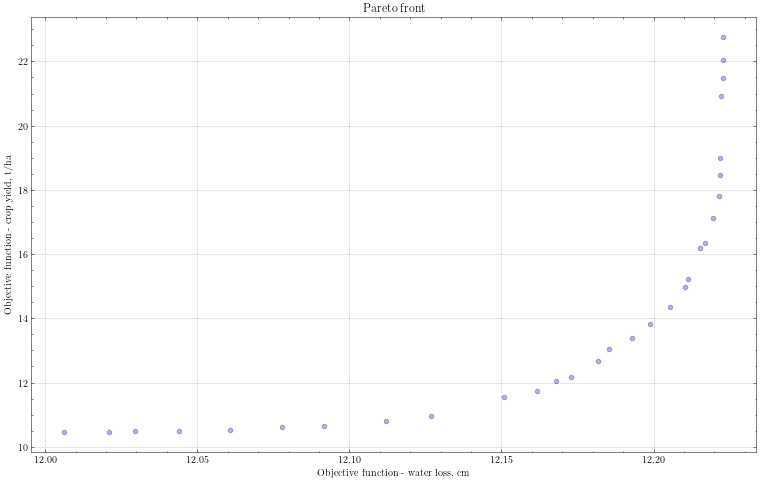

In [31]:
plt.figure(figsize=(13,8))
plt.style.use(['science', 'grid'])
plt.scatter( paretto_front[:,0], paretto_front[:,1], edgecolors='black', facecolor='blue', s=20, alpha=0.3)
plt.xlabel('Objective function - water loss, cm')
plt.ylabel('Objective function - crop yield, t/ha')
plt.title('Pareto front')
# plt.legend()
# plt.savefig('./plots_ICCS/pareto_front_sugar_beet.png', dpi=300)
# plt.savefig('./plots_ICCS/pareto_front_sugar_beet.svg' )

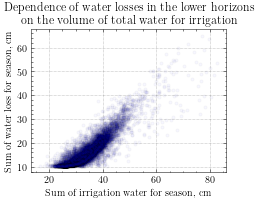

In [5]:
# plt.figure(figsize=(13,8))
plt.style.use(['science', 'grid'])
plt.scatter( irrigation_amount, water_loss, edgecolors='black', facecolor='blue', s=10, alpha=0.03)
# plt.scatter( irrigation_amount, water_loss, s=1, alpha=0.3)
plt.xlabel('Sum of irrigation water for season, cm')
plt.ylabel('Sum of water loss for season, cm')
plt.title('Dependence of water losses in the lower horizons\n on the volume of total water for irrigation')
# plt.legend()
plt.savefig('./plots_ICCS/water_loss_irrigation_300_steps.png', dpi=300)
plt.savefig('./plots_ICCS/water_loss_irrigation_300_steps.svg' )

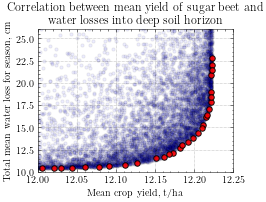

In [6]:
# plt.figure(figsize=(13,8))
plt.style.use(['science'])
plt.scatter( crop_yield, water_loss, edgecolors='black', facecolor='blue', s=10, alpha=0.07)

plt.scatter( paretto_front[:,0], paretto_front[:,1], edgecolors='black', facecolor='red', s=30, alpha=0.9)
plt.xlabel('Mean crop yield, t/ha')
plt.ylabel('Total mean water loss for season, cm')
plt.title('Correlation between mean yield of sugar beet and\n water losses into deep soil horizon')
plt.xlim(12,12.25)
plt.ylim(10,26)
# plt.legend()
plt.savefig('./plots_ICCS/pareto_front_and_all_solutions_sugar_beet_cropped.png', dpi=300)
plt.savefig('./plots_ICCS/pareto_front_and_all_solutions_sugar_beet_cropped.svg' )
plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
# t = np.linspace(0, 20, 100)
x, y, z = irrigation_amount, water_loss, crop_yield

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,                # set color to an array/list of desired values
        colorscale='sunset',   # choose a colorscale
        opacity=0.6
    )
)])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='Total irrigation amount, cm',
                    yaxis_title='Total Water loss, cm',
                    zaxis_title='Crop yield, t/ha'),
                    margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Plots for potato

In [8]:
#load files and data to plot 
potato_crop_yield = np.load('./npy_files/steps_300/картофельcrop_yields.npy')
potato_irrigation_amount = np.load('./npy_files/steps_300/картофельirrifation_ammount.npy')
potato_water_loss = np.load('./npy_files/steps_300/картофельwater_loss.npy')
potato_paretto_front = np.load('./npy_files/steps_300/картофельfunction_values_for_paretto.npy')
potato_optimal_solution = np.load('./npy_files/steps_300/картофельoptimal_solutions.npy',allow_pickle=True)


In [74]:
opt_potato_crop_yiled = potato_crop_yield[potato_crop_yield>12.5]
opt_potato_crop_yiled = opt_crop_yiled[opt_crop_yiled<14.6]

In [73]:
opt_potato_water_loss = potato_water_loss[potato_water_loss>10]
opt_potato_water_loss = opt_potato_water_loss[opt_potato_water_loss<26]

In [87]:
# np.where(potato_crop_yield>12.5)
potato_crop_yield[np.where((potato_crop_yield>12.5) & (potato_crop_yield<14.6))]

(6532,)

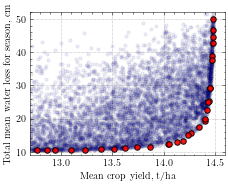

In [18]:
# plt.figure(figsize=(7,6))
plt.style.use(['science'])
plt.scatter( potato_crop_yield, potato_water_loss, edgecolors='black', facecolor='blue', s=10, alpha=0.07)

plt.scatter( potato_paretto_front[:,0], potato_paretto_front[:,1], edgecolors='black', facecolor='red', s=30, alpha=0.9, label='Paretto-set')
plt.xlabel('Mean crop yield, t/ha')
plt.ylabel('Total mean water loss for season, cm')
# plt.title('Correlation between mean yield of sugar beet and\n water losses into deep soil horizon')
plt.xlim(12.7,14.6)
plt.ylim(9,52)
# plt.legend()
plt.savefig('./plots_ICCS/pareto_front_and_all_solutions_potato_cropped.png', dpi=300)
plt.savefig('./plots_ICCS/pareto_front_and_all_solutions_potato_cropped.svg' )
plt.show()

### Historical yield plot 